In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from librosa import hz_to_note

In [7]:
sample_rate, audio_data = wav.read("chords/CmajMelody1.wav")

In [8]:
# if we have stereo input
if len(audio_data.shape) == 2:
    # pick out only one channel
    audio_data = audio_data[:, 0]

audio_data

array([  0,   0,   0, ..., -14, -14, -14], dtype=int16)

In [9]:
# Perform Fourier Transform
# Note: Contains complex numbers representing the frequency components
fft_result = fft(audio_data)

# Calculate Frequencies
fft_freq = fftfreq(len(audio_data), d=1/sample_rate)

In [10]:
for i in range(10):
    print(f"Frequency {fft_freq[i]} Hz, Magnitude: {abs(fft_result[i])}")

Frequency 0.0 Hz, Magnitude: 18970.0
Frequency 0.09237072287945305 Hz, Magnitude: 1149.606356369974
Frequency 0.1847414457589061 Hz, Magnitude: 2220.972392744737
Frequency 0.2771121686383592 Hz, Magnitude: 2886.224985854517
Frequency 0.3694828915178122 Hz, Magnitude: 2273.8869207325342
Frequency 0.46185361439726524 Hz, Magnitude: 2146.4577901428206
Frequency 0.5542243372767184 Hz, Magnitude: 1212.1488366432354
Frequency 0.6465950601561714 Hz, Magnitude: 1097.785095005226
Frequency 0.7389657830356244 Hz, Magnitude: 1508.770901080985
Frequency 0.8313365059150775 Hz, Magnitude: 1771.893523164115


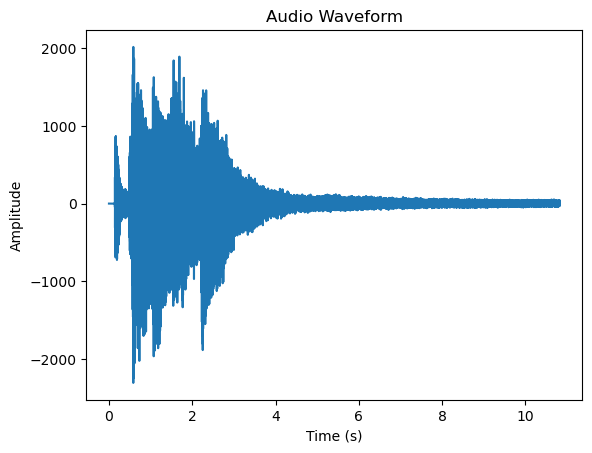

In [11]:
# Time domain Plot
time = np.arange(len(audio_data)) / sample_rate  # Create time axis
plt.plot(time, audio_data)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Audio Waveform")
plt.show()

In [12]:
# Isolating positive frequencies
# Note: only first half of values are unique/positive
n = len(fft_freq) - 1
abs_fft_result = abs(fft_result)**2
pos_fft_freq = fft_freq[:n // 2]
pos_fft_result = abs_fft_result[:n // 2]

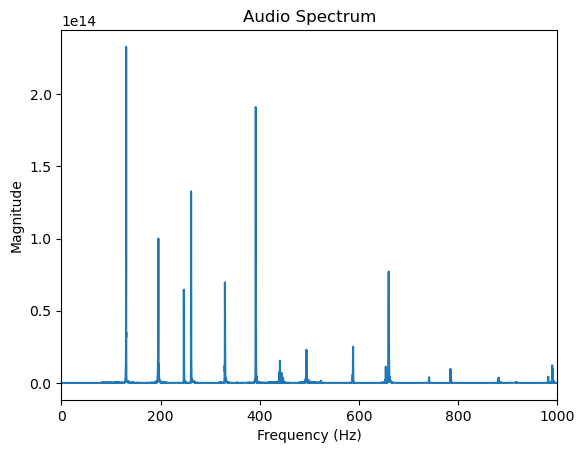

In [13]:
# Frequency Domain Plot

plt.plot(pos_fft_freq, pos_fft_result)  # Plot absolute values of frequency components
plt.xlim(0, 1000)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Audio Spectrum")
plt.show()

In [14]:
# Extracting notes from the frequency domain plot
max_freq = np.argmax(pos_fft_result)
print(pos_fft_freq[max_freq])

130.51983142866717


In [15]:
# Note: Distance between note frequencies becomes smaller in the lower ranges
# https://mixbutton.com/mixing-articles/music-note-to-frequency-chart/
peaks, _ = find_peaks(pos_fft_result, prominence=5e13, distance=30)

In [16]:
pos_fft_freq[peaks].shape

(7,)

In [17]:
note_frequencies = pos_fft_freq[peaks]
note_frequencies

array([130.51983143, 195.45644961, 246.81457153, 261.40914575,
       329.67110996, 391.83660645, 659.89644425])

In [18]:
notes = hz_to_note(note_frequencies)

Determine the Key of the song

In [33]:
from librosa.feature import chroma_stft
from pprint import pprint
import librosa

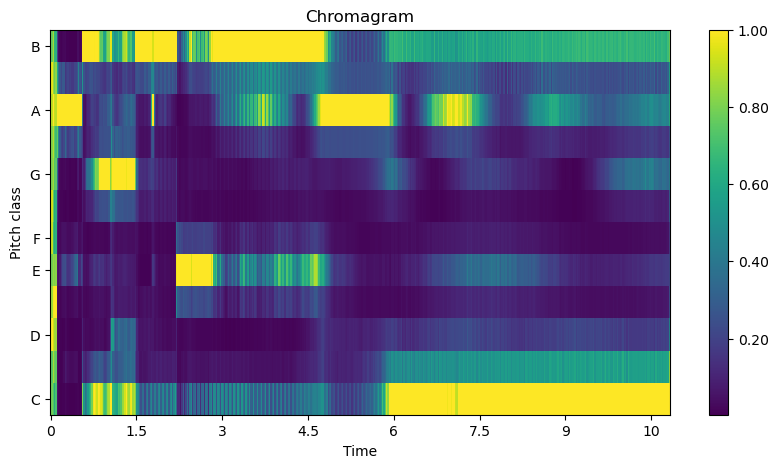

In [45]:
# Load audio and extract chromagram
y, sr = librosa.load("chords/CmajMelody1.wav")
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

# Visualize the chromagram (optional)
plt.figure(figsize=(10, 5))
librosa.display.specshow(chromagram, x_axis="time", y_axis="chroma", cmap="viridis")
plt.title("Chromagram")
plt.colorbar(format="%.2f")
plt.show()

In [34]:
audio, sr = librosa.load('chords/CMajMelody1.wav')

In [46]:
chromagram = chroma_stft(y=audio, sr=sr)
chromagram.shape

(12, 467)

In [47]:
chromagram[:, 0]

array([0.6075588 , 0.5626021 , 1.        , 0.8682591 , 0.79861206,
       0.9680913 , 0.83080316, 0.6625716 , 0.6620939 , 0.7245151 ,
       0.8281632 , 0.6312038 ], dtype=float32)

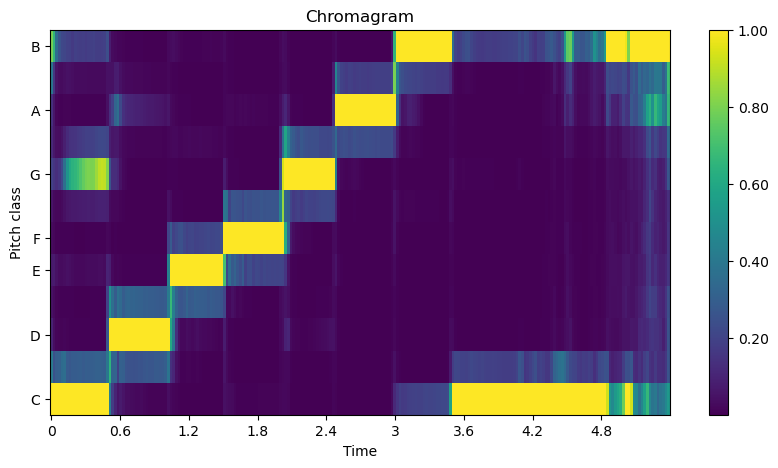

In [48]:
# Load audio and extract chromagram
y, sr = librosa.load("chords/CMajorScale.wav")
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

# Visualize the chromagram (optional)
plt.figure(figsize=(10, 5))
librosa.display.specshow(chromagram, x_axis="time", y_axis="chroma", cmap="viridis")
plt.title("Chromagram")
plt.colorbar(format="%.2f")
plt.show()

In [123]:
from music21 import scale
import json

In [111]:
# Testing Key Estimation
centers = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

major = dict(list())
minor = dict(list())
for center in centers:
    # could add more scales later (ex. lydian, mixolydian, etc.)
    maj_scale = [str(note)[:-1] for note in scale.MajorScale(center).getPitches()]
    min_scale = [str(note)[:-1] for note in scale.MinorScale(center).getPitches()]

    major_profile = [0] * 12
    minor_profile = [0] * 12

    for i, note in enumerate(centers):
        if note in maj_scale:
            major_profile[i] = 1

    for i, note in enumerate(centers):
        if note in min_scale:
            minor_profile[i] = 1

    major[center] = major_profile
    minor[center] = minor_profile

In [112]:
minor

{'C': [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 'C#': [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1],
 'D': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0],
 'D#': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1],
 'E': [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
 'F': [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 'F#': [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
 'G': [1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
 'G#': [0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
 'A': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
 'A#': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
 'B': [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]}

In [113]:
major

{'C': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
 'C#': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
 'D': [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
 'D#': [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 'E': [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1],
 'F': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0],
 'F#': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1],
 'G': [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
 'G#': [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 'A': [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
 'A#': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
 'B': [0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1]}

In [126]:
with open("key_profiles/major.json", "w") as f:
    json.dump(major, f)

In [127]:
with open("key_profiles/minor.json", "w") as f:
    json.dump(minor, f)

In [ ]:
def similarities(note, mode='major'):
    maj_scale = [str(note)[:-1] for note in scale.MajorScale(center).getPitches()]
    min_scale = [str(note)[:-1] for note in scale.MinorScale(center).getPitches()]


In [114]:
chroma_matrix = np.matrix(chromagram).T

major_similarities = {}
for key in major:
    profile = np.matrix(major[key]).T
    score = np.mean(chroma_matrix * profile)
    major_similarities[key] = score

minor_similarities = {}
for key in minor:
    profile = np.matrix(minor[key]).T
    score = np.mean(chroma_matrix * profile) 
    minor_similarities[key] = score

In [115]:
major_similarities

{'C': 1.4201460743758807,
 'C#': 0.4341010669359874,
 'D': 1.0511353191729986,
 'D#': 0.24079053589027974,
 'E': 0.9223256117739657,
 'F': 1.1315354922159904,
 'F#': 0.7227116490958777,
 'G': 1.350748839320118,
 'G#': 0.3707054589154457,
 'A': 0.9705962704136142,
 'A#': 0.16050384428585604,
 'B': 0.8504174454272604}

In [116]:
minor_similarities

{'C': 0.8451897877536849,
 'C#': 0.9223256117739657,
 'D': 1.1315354922159904,
 'D#': 0.7227116490958777,
 'E': 1.350748839320118,
 'F': 0.7231470266123979,
 'F#': 0.9705962704136142,
 'G': 1.0038296958846078,
 'G#': 0.8504174454272604,
 'A': 1.4201460743758807,
 'A#': 0.4341010669359874,
 'B': 1.0511353191729986}

In [82]:
major_similarities.items()

dict_items([('C', 1.4201460743758807), ('C#', 0.4341010669359874), ('D', 1.0511353191729986), ('D#', 0.24079053589027974), ('E', 0.9223256117739657), ('F', 1.1315354922159904), ('F#', 0.7227116490958777), ('G', 1.350748839320118), ('G#', 0.3707054589154457), ('A', 0.9705962704136142), ('A#', 0.16050384428585604), ('B', 0.8504174454272604)])

In [117]:
minor_similarities.items()

dict_items([('C', 0.8451897877536849), ('C#', 0.9223256117739657), ('D', 1.1315354922159904), ('D#', 0.7227116490958777), ('E', 1.350748839320118), ('F', 0.7231470266123979), ('F#', 0.9705962704136142), ('G', 1.0038296958846078), ('G#', 0.8504174454272604), ('A', 1.4201460743758807), ('A#', 0.4341010669359874), ('B', 1.0511353191729986)])

In [118]:
sorted_major_similarties = sorted(major_similarities.items(), key=lambda x: x[1])
sorted_major_array = np.array(sorted_major_similarties)
pprint(sorted_major_array[:, 1])

array(['0.16050384428585604', '0.24079053589027974', '0.3707054589154457',
       '0.4341010669359874', '0.7227116490958777', '0.8504174454272604',
       '0.9223256117739657', '0.9705962704136142', '1.0511353191729986',
       '1.1315354922159904', '1.350748839320118', '1.4201460743758807'],
      dtype='<U32')


In [119]:
sorted_minor_similarties = sorted(minor_similarities.items(), key=lambda x: x[1])
sorted_minor_array = np.array(sorted_minor_similarties)
pprint(sorted_minor_array[:, 1])

array(['0.4341010669359874', '0.7227116490958777', '0.7231470266123979',
       '0.8451897877536849', '0.8504174454272604', '0.9223256117739657',
       '0.9705962704136142', '1.0038296958846078', '1.0511353191729986',
       '1.1315354922159904', '1.350748839320118', '1.4201460743758807'],
      dtype='<U32')


Text(0, 0.5, 'Score')

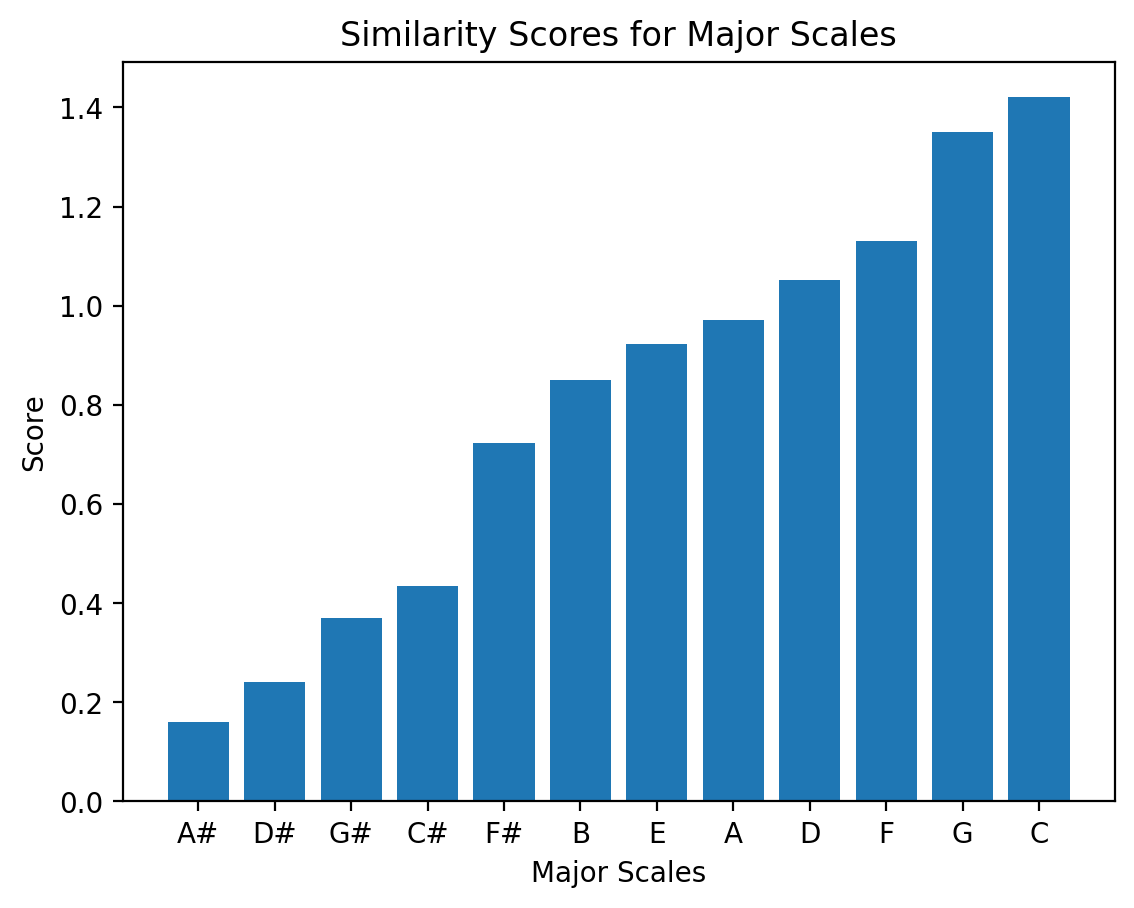

In [120]:
notes = sorted_major_array[:, 0]
scores = sorted_major_array[:, 1].astype(float)

plt.bar(notes, scores)
plt.title("Similarity Scores for Major Scales")
plt.xlabel("Major Scales")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

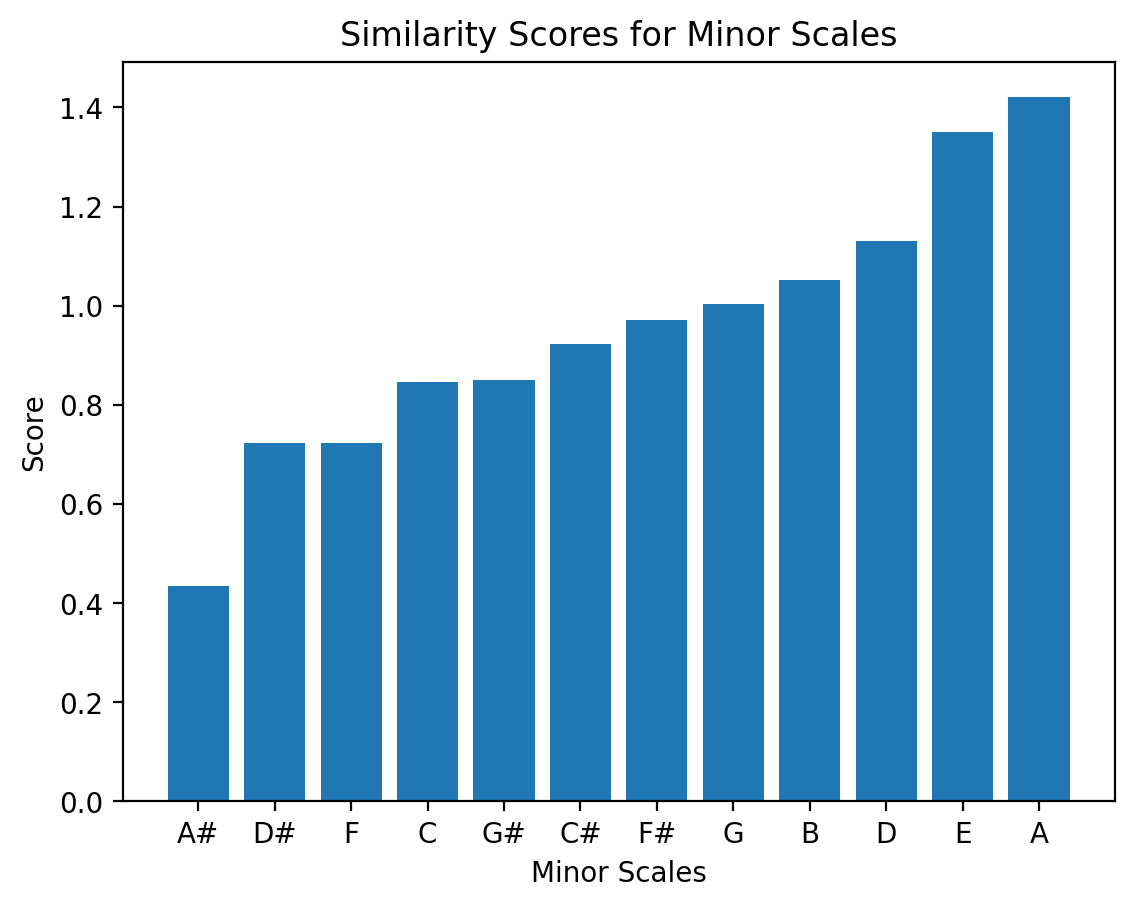

In [122]:
notes = sorted_minor_array[:, 0]
scores = sorted_minor_array[:, 1].astype(float)

plt.bar(notes, scores)
plt.title("Similarity Scores for Minor Scales")
plt.xlabel("Minor Scales")
plt.ylabel("Score")

Note: A minor and C major are the same key

In [64]:
# Create a scale object for C major
c_major_scale = scale.MinorScale('C')

# Access the notes in the scale
notes = c_major_scale.getPitches()

# Print the notes
for note in notes:
  print(str(note)[:-1])

C
D
E-
F
G
A-
B-
C


Next Goal: Split the Audio signal into many small "time" chunks to find the ordering of the notes in the song
and consider making an adaptive method that finds the period of the signal and decomposes over adaptive ranges

Next Goal: Split the Audio signal into many small "time" chunks to find the ordering of the notes in the song
and consider making an adaptive method that finds the period of the signal and decomposes over adaptive ranges